## Introduction to Data Science - Practical Exam


### Code & Motivation

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
import warnings
import statsmodels.api as sm


#### Loading Data

I decided to use all 3 data sets to be able to derive as many inights as possible.

In [2]:
df = pd.read_csv("air_quality_4_boroughs_2020.csv")
df

dfPopulation = pd.read_csv("ethic-group-by-borough_2020.csv")

dfPopulation

dfWage = pd.read_csv("hourly_wage_by_borough_2020.csv")
dfWage

,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
0,Barking and Dagenham,NaN,NaN,NaN,01/01/2020 00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Barking and Dagenham,31.8,42.0,6.7,01/01/2020 01:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Barking and Dagenham,31.4,47.7,10.6,01/01/2020 02:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Barking and Dagenham,30.0,51.5,14.1,01/01/2020 03:00,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Barking and Dagenham,29.0,50.6,14.1,01/01/2020 04:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
35131,Sutton,NaN,NaN,NaN,31/12/2020 19:00,8779.0,0.0,0.0,0.0,0.0,0.0,0.000009
35132,Sutton,NaN,NaN,NaN,31/12/2020 20:00,8780.0,0.0,0.0,0.0,0.0,0.0,0.000009
35133,Sutton,NaN,NaN,NaN,31/12/2020 21:00,8781.0,0.0,0.0,0.0,0.0,0.0,0.000009
35134,Sutton,NaN,NaN,NaN,31/12/2020 22:00,8782.0,0.0,0.0,0.0,0.0,0.0,0.000009


,Area,White,Asian,Black,Mixed/ Other,Total
0,Barking and Dagenham,"109,000","54,000","36,000","15,000","215,000"
1,Barnet,"250,000","57,000","30,000","54,000","390,000"
2,Bexley,"195,000","17,000","21,000","15,000","248,000"
3,Brent,"102,000","107,000","62,000","56,000","328,000"
4,Bromley,"267,000","15,000","21,000","28,000","330,000"
5,Camden,"158,000","39,000","19,000","38,000","255,000"
6,Croydon,"227,000","70,000","64,000","24,000","386,000"
7,Ealing,"174,000","96,000","23,000","50,000","343,000"
8,Enfield,"206,000","37,000","74,000","20,000","337,000"
9,Greenwich,"178,000","39,000","48,000","19,000","284,000"


,Area,Hourly_Wage
0,Barking and Dagenham,13.10
1,Barnet,15.15
2,Bexley,16.44
3,Brent,15.02
4,Bromley,19.72
5,Camden,18.91
6,Croydon,15.61
7,Ealing,15.33
8,Enfield,14.55
9,Greenwich,15.90


In [3]:
df.dtypes

Site                       object
NO2                       float64
NOX                       float64
NO                        float64
ReadingDateTime            object
Since_start_of_year       float64
NO2_rolling_daily_mean    float64
NOX_rolling_daily_mean    float64
NO_rolling_daily_mean     float64
NOX_rolling_daily_std     float64
NO2_rolling_daily_std     float64
NO_rolling_daily_std      float64
dtype: object

#### Finding Rows with Max & Min Levels of Each Pollutant

In [4]:
df.nlargest(1,['NO2'])
df.nsmallest(1,['NO2'])

df.nlargest(1,['NOX'])
df.nsmallest(1,['NOX'])

df.nlargest(1,['NO'])
df.nsmallest(1,['NO'])

,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
31625,Sutton,191.60001,347.10001,101.4,07/08/2020 17:00,5273.0,87.325,154.775001,43.991667,75.678988,40.393062,24.803557


,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
1707,Barking and Dagenham,-3.8,2.8,4.3,12/03/2020 03:00,1707.0,5.333333,13.141667,5.091667,7.592154,6.094521,1.233559


,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
26839,Sutton,179.7,961.79999,510.10001,21/01/2020 07:00,487.0,98.862501,310.82083,138.233335,192.163993,36.719145,103.372215


,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
12506,Hackney,-0.3,-1.0,-0.4,04/06/2020 02:00,3722.0,18.679167,26.845833,5.316667,26.675326,17.206015,7.097622


,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
26839,Sutton,179.7,961.79999,510.10001,21/01/2020 07:00,487.0,98.862501,310.82083,138.233335,192.163993,36.719145,103.372215


,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std
32570,Sutton,31.9,29.3,-1.7,16/09/2020 02:00,6218.0,75.591667,118.829167,28.191667,50.75021,24.186772,20.961744


#### Merging Data

I decided to merge the data sets since it would be easier to spot trends within data and simplify the process of looking through multiple data sets to find an explanation for any trends spotted in the Air Quality data set.

In [5]:
dfPopulation.rename(columns={'Area': 'Site'}, inplace=True)


dfWage.rename(columns={'Area': 'Site'}, inplace=True)


In [7]:
df.merge(dfWage, on='Site')

,Site,NO2,NOX,NO,ReadingDateTime,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage
0,Barking and Dagenham,NaN,NaN,NaN,01/01/2020 00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,13.1
1,Barking and Dagenham,31.8,42.0,6.7,01/01/2020 01:00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,13.1
2,Barking and Dagenham,31.4,47.7,10.6,01/01/2020 02:00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,13.1
3,Barking and Dagenham,30.0,51.5,14.1,01/01/2020 03:00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,13.1
4,Barking and Dagenham,29.0,50.6,14.1,01/01/2020 04:00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,Sutton,NaN,NaN,NaN,31/12/2020 19:00,8779.0,0.0,0.0,0.0,0.0,0.0,0.000009,15.8
35132,Sutton,NaN,NaN,NaN,31/12/2020 20:00,8780.0,0.0,0.0,0.0,0.0,0.0,0.000009,15.8
35133,Sutton,NaN,NaN,NaN,31/12/2020 21:00,8781.0,0.0,0.0,0.0,0.0,0.0,0.000009,15.8
35134,Sutton,NaN,NaN,NaN,31/12/2020 22:00,8782.0,0.0,0.0,0.0,0.0,0.0,0.000009,15.8


In [9]:
df_withHourly = df.merge(dfWage, on='Site')

In [11]:
df_combined = df_withHourly.merge(dfPopulation, on='Site')

#### Dropping Rows with NaN


In [12]:
df_combined = df_combined.dropna()

In [13]:
df_combined. describe ()

,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage
count,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000,33791.000000
mean,30.074765,56.881282,17.484147,4286.073925,29.876638,56.491897,17.357214,29.314793,11.977024,12.241891,15.527728
std,22.099002,59.702816,26.902696,2483.117912,17.144723,45.199792,19.780166,26.582983,7.576715,13.832809,1.449810
min,-3.800000,-1.000000,-1.700000,0.000000,0.429167,0.645833,0.000000,0.573936,0.512454,0.000002,13.100000
25%,13.300000,17.600000,2.200000,2135.500000,16.783333,24.833333,4.575000,11.338874,6.601037,3.028271,13.100000
50%,24.800000,38.900000,8.000000,4285.000000,26.950000,46.170834,12.020833,22.332682,10.400306,8.319734,16.460000
75%,41.800000,75.000000,22.050000,6428.500000,39.958333,74.685417,23.302083,38.617394,15.395983,16.189301,16.740000
max,191.600010,961.799990,510.100010,8783.000000,119.224999,361.483334,188.170832,225.821561,58.828533,126.102126,16.740000


####  Converting to Intergers and Checking Data Types

In [14]:
cols = ['White','Asian', 'Black','Mixed/ Other','Total']
for col in cols:
    df_combined[col] = df_combined[col].apply(lambda x: pd.to_numeric(''.join(x.split(','))))
print(df_combined.dtypes)

Site                       object
NO2                       float64
NOX                       float64
NO                        float64
ReadingDateTime            object
Since_start_of_year       float64
NO2_rolling_daily_mean    float64
NOX_rolling_daily_mean    float64
NO_rolling_daily_mean     float64
NOX_rolling_daily_std     float64
NO2_rolling_daily_std     float64
NO_rolling_daily_std      float64
Hourly_Wage               float64
White                       int64
Asian                       int64
Black                       int64
Mixed/ Other                int64
Total                       int64
dtype: object


#### Plotting Data by Site

For easy comparison of pollutant levels/Wage/Population across all 4 boroughs.

,Site,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage,White,Asian,Black,Mixed/ Other,Total
0,Barking and Dagenham,16.038862,24.554757,5.555648,4329.827097,15.960006,24.432962,5.527638,13.510897,7.366037,4.874580,13.10,109000,54000,36000,15000,215000
1,Hackney,36.459205,66.451529,19.565252,4390.335272,36.155176,65.978405,19.446352,27.983512,11.474820,11.793639,16.74,144000,32000,63000,42000,281000
2,Lewisham,28.951657,55.481653,17.301796,4388.449010,28.693965,54.824802,17.041491,26.369603,10.581311,11.369919,16.46,193000,23000,58000,30000,305000
3,Sutton,39.413510,82.630004,28.184647,4015.491916,39.266936,82.336196,28.088590,50.841764,18.964502,21.545882,15.80,147000,36000,11000,10000,204000


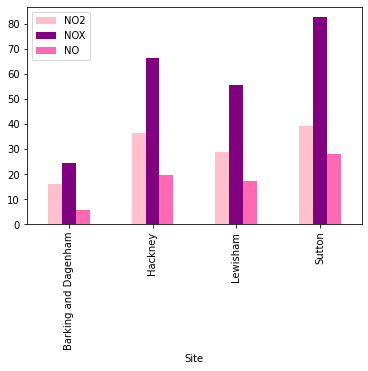

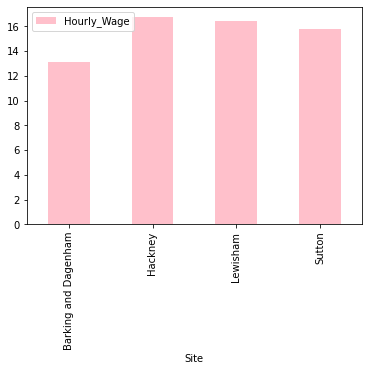

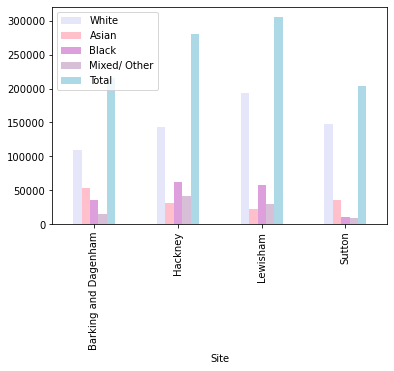

In [15]:
dfgraph = df_combined.groupby(by="Site").mean()
dfgraph.reset_index(level=0, inplace=True)
dfgraph

# Pollutants per Site
dfgraph.plot(x="Site", y=["NO2", "NOX","NO"], kind="bar",color=['pink','purple', 'hotpink'])

# Average Hourly Wage per Site
dfgraph.plot(x="Site", y=["Hourly_Wage"], kind="bar",color=['pink'])

# Average Population per Site
dfgraph.plot(x="Site", y=["White","Asian","Black","Mixed/ Other","Total"], kind="bar",color=['lavender','pink','plum','thistle','lightblue'])

#### Splitting Data Frame Based on Area

I split the data set based on the site so that I can easily find trends specifically within each area instead of looking at it as a whole.

In [16]:
df1 = df_combined[df_combined['Site'] == 'Barking and Dagenham']
df2 = df_combined[df_combined['Site'] == 'Hackney']
df3 = df_combined[df_combined['Site'] == 'Lewisham']
df4 = df_combined[df_combined['Site'] == 'Sutton']

In [17]:
df1.describe ()
df2.describe ()
df3.describe ()
df4.describe ()

,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage,White,Asian,Black,Mixed/ Other,Total
count,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8525.000000,8.525000e+03,8525.0,8525.0,8525.0,8525.0,8525.0
mean,16.038862,24.554757,5.555648,4329.827097,15.960006,24.432962,5.527638,13.510897,7.366037,4.874580,1.310000e+01,109000.0,54000.0,36000.0,15000.0,215000.0
std,13.455593,41.939168,21.531607,2486.813129,10.338697,33.624407,16.662573,21.597726,4.903480,12.944622,1.803108e-12,0.0,0.0,0.0,0.0,0.0
min,-3.800000,0.000000,-0.400000,23.000000,0.645833,0.645833,0.000000,0.573936,0.512454,0.000002,1.310000e+01,109000.0,54000.0,36000.0,15000.0,215000.0
25%,7.100000,9.000000,1.000000,2189.000000,9.345833,11.391667,1.170833,4.151864,3.636400,0.655191,1.310000e+01,109000.0,54000.0,36000.0,15000.0,215000.0
50%,11.900000,14.500000,1.500000,4329.000000,12.962500,15.708333,1.812500,7.066265,6.022344,1.108040,1.310000e+01,109000.0,54000.0,36000.0,15000.0,215000.0
75%,19.900000,23.900000,2.700000,6472.000000,19.520833,24.250000,2.887500,13.581410,9.749938,2.668166,1.310000e+01,109000.0,54000.0,36000.0,15000.0,215000.0
max,108.500000,776.000000,435.299990,8640.000000,72.950000,361.483334,188.170832,205.191469,32.000389,121.454366,1.310000e+01,109000.0,54000.0,36000.0,15000.0,215000.0


,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage,White,Asian,Black,Mixed/ Other,Total
count,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8599.000000,8.599000e+03,8599.0,8599.0,8599.0,8599.0,8599.0
mean,36.459205,66.451529,19.565252,4390.335272,36.155176,65.978405,19.446352,27.983512,11.474820,11.793639,1.674000e+01,144000.0,32000.0,63000.0,42000.0,281000.0
std,19.982301,49.409059,21.700854,2558.648857,15.319961,37.763541,16.311706,15.927790,5.498641,8.530139,1.250628e-12,0.0,0.0,0.0,0.0,0.0
min,-1.200000,-1.000000,-1.600000,0.000000,0.429167,0.741667,0.204167,1.510231,1.386477,0.482671,1.674000e+01,144000.0,32000.0,63000.0,42000.0,281000.0
25%,21.100000,31.500000,5.200000,2153.500000,24.839583,39.502083,8.470833,15.969270,7.694925,5.683073,1.674000e+01,144000.0,32000.0,63000.0,42000.0,281000.0
50%,33.700000,54.000000,12.500000,4406.000000,34.833333,59.191667,15.275000,25.017307,10.641203,9.811702,1.674000e+01,144000.0,32000.0,63000.0,42000.0,281000.0
75%,48.400000,88.400000,26.500000,6633.500000,45.316667,84.833333,25.950000,36.392231,14.181995,15.874776,1.674000e+01,144000.0,32000.0,63000.0,42000.0,281000.0
max,180.800000,478.700010,251.899990,8783.000000,119.224999,317.604165,147.741666,121.306081,54.997891,65.883213,1.674000e+01,144000.0,32000.0,63000.0,42000.0,281000.0


,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage,White,Asian,Black,Mixed/ Other,Total
count,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8688.000000,8.688000e+03,8688.0,8688.0,8688.0,8688.0,8688.0
mean,28.951657,55.481653,17.301796,4388.449010,28.693965,54.824802,17.041491,26.369603,10.581311,11.369919,1.646000e+01,193000.0,23000.0,58000.0,30000.0,305000.0
std,16.808149,44.341559,20.434728,2527.816554,12.451199,32.127813,14.491229,15.181924,4.688436,8.490588,1.907917e-12,0.0,0.0,0.0,0.0,0.0
min,0.100000,1.700000,-1.500000,0.000000,0.612500,1.270833,0.429167,3.405747,1.776089,0.834307,1.646000e+01,193000.0,23000.0,58000.0,30000.0,305000.0
25%,16.400000,25.900000,4.700000,2200.750000,20.050000,34.103125,8.303125,15.510105,7.047492,5.847515,1.646000e+01,193000.0,23000.0,58000.0,30000.0,305000.0
50%,25.800000,43.900000,11.300000,4375.500000,26.441667,47.589583,13.112500,22.788962,9.958899,8.838771,1.646000e+01,193000.0,23000.0,58000.0,30000.0,305000.0
75%,38.200000,71.000000,21.800000,6577.250000,35.220833,67.417708,21.196875,33.830226,13.239554,14.580258,1.646000e+01,193000.0,23000.0,58000.0,30000.0,305000.0
max,107.000000,447.500000,236.500000,8783.000000,76.879167,263.120833,125.216669,127.904448,40.997227,67.388656,1.646000e+01,193000.0,23000.0,58000.0,30000.0,305000.0


,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage,White,Asian,Black,Mixed/ Other,Total
count,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7979.000000,7.979000e+03,7979.0,7979.0,7979.0,7979.0,7979.0
mean,39.413510,82.630004,28.184647,4015.491916,39.266936,82.336196,28.088590,50.841764,18.964502,21.545882,1.580000e+01,147000.0,36000.0,11000.0,10000.0,204000.0
std,28.177856,81.024847,36.559194,2322.903641,19.231554,54.017692,23.990570,35.049706,9.326703,18.134633,2.019844e-12,0.0,0.0,0.0,0.0,0.0
min,1.400000,1.200000,-1.700000,0.000000,3.225000,7.825000,1.466667,2.476495,1.645459,0.718984,1.580000e+01,147000.0,36000.0,11000.0,10000.0,204000.0
25%,18.000000,28.500000,5.800000,1999.500000,25.070833,45.614583,13.189583,26.407818,12.027906,9.640960,1.580000e+01,147000.0,36000.0,11000.0,10000.0,204000.0
50%,33.100000,59.000000,16.500000,4030.000000,36.145833,70.220834,22.070833,42.382316,17.449204,16.314764,1.580000e+01,147000.0,36000.0,11000.0,10000.0,204000.0
75%,54.200000,109.150000,36.800000,6028.500000,49.789583,101.866666,34.706250,67.126533,24.963497,28.288889,1.580000e+01,147000.0,36000.0,11000.0,10000.0,204000.0
max,191.600010,961.799990,510.100010,8031.000000,110.833332,359.708332,166.879168,225.821561,58.828533,126.102126,1.580000e+01,147000.0,36000.0,11000.0,10000.0,204000.0


#### Correlation Matrix

I wanted to find out how each variable was affecting each other, and use the information to identify trends and gain insights.

In [18]:
corr = df_combined.corr()
corr.style.background_gradient(cmap='RdPu').set_precision(2)

,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage,White,Asian,Black,Mixed/ Other,Total
NO2,1.00,0.89,0.75,0.00,0.71,0.66,0.58,0.58,0.53,0.56,0.34,0.17,-0.26,-0.04,0.10,0.06
NOX,0.89,1.00,0.97,0.02,0.64,0.70,0.68,0.63,0.47,0.64,0.28,0.16,-0.22,-0.08,0.04,0.02
NO,0.75,0.97,1.00,0.03,0.54,0.66,0.67,0.60,0.40,0.63,0.22,0.14,-0.18,-0.09,0.00,0.00
Since_start_of_year,0.00,0.02,0.03,1.00,0.01,0.03,0.04,0.01,-0.03,0.03,0.00,0.01,-0.01,0.06,0.05,0.05
NO2_rolling_daily_mean,0.71,0.64,0.54,0.01,1.00,0.91,0.80,0.78,0.72,0.75,0.43,0.22,-0.34,-0.05,0.13,0.07
NOX_rolling_daily_mean,0.66,0.70,0.66,0.03,0.91,1.00,0.97,0.87,0.65,0.90,0.36,0.21,-0.29,-0.11,0.05,0.03
NO_rolling_daily_mean,0.58,0.68,0.67,0.04,0.80,0.97,1.00,0.86,0.56,0.91,0.30,0.18,-0.24,-0.13,0.00,-0.00
NOX_rolling_daily_std,0.58,0.63,0.60,0.01,0.78,0.87,0.86,1.00,0.83,0.98,0.26,0.15,-0.20,-0.28,-0.14,-0.13
NO2_rolling_daily_std,0.53,0.47,0.40,-0.03,0.72,0.65,0.56,0.83,1.00,0.70,0.25,0.12,-0.18,-0.34,-0.18,-0.18
NO_rolling_daily_std,0.56,0.64,0.63,0.03,0.75,0.90,0.91,0.98,0.70,1.00,0.24,0.15,-0.19,-0.22,-0.10,-0.09


#### Multiple Regression Model

In [78]:
x = df_combined[['NO2','NOX','NO','NO2_rolling_daily_mean','NOX_rolling_daily_mean','NO_rolling_daily_mean','NOX_rolling_daily_std','NO2_rolling_daily_std','NO_rolling_daily_std']]
y = df_combined['Hourly_Wage']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 157)

In [79]:
from sklearn import linear_model 

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
print(regr.coef_, regr.intercept_)

LinearRegression()

[-0.00742875  0.01372093 -0.02234533 -0.73206272  0.78164846 -1.19473064
  0.11757637 -0.13379802 -0.19884285] 14.39846748092473


In [83]:
predictions = regr.predict(x_test)


In [84]:
def rmse(targets, predictions):
    return np.sqrt(((predictions - targets) ** 2).mean())
print(f'The R2 score is: {r2_score(y_test, predictions)}')
print(f'The RMSE score is {rmse(y_test, predictions)}')

The R2 score is: 0.2202395616365317
The RMSE score is 1.2718966739478426


In [86]:
regr.predict([[21.0,22.4,0.9,30.604167,48.091667,11.408333,14.655906,9.067404,7.961260]])

array([15.01337216])

#### Classification Model

In [26]:
def plot_decision(X,y,model,n_classes=2):
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    model.fit(X, y)
    yhat = model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='binary_r')
    for class_value in range(n_classes):
        row_ix = np.where(y == class_value)
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='binary_r')

DecisionTreeClassifier(max_depth=20)

Accuracy: 79.53839325343985


<Figure size 1080x576 with 0 Axes>

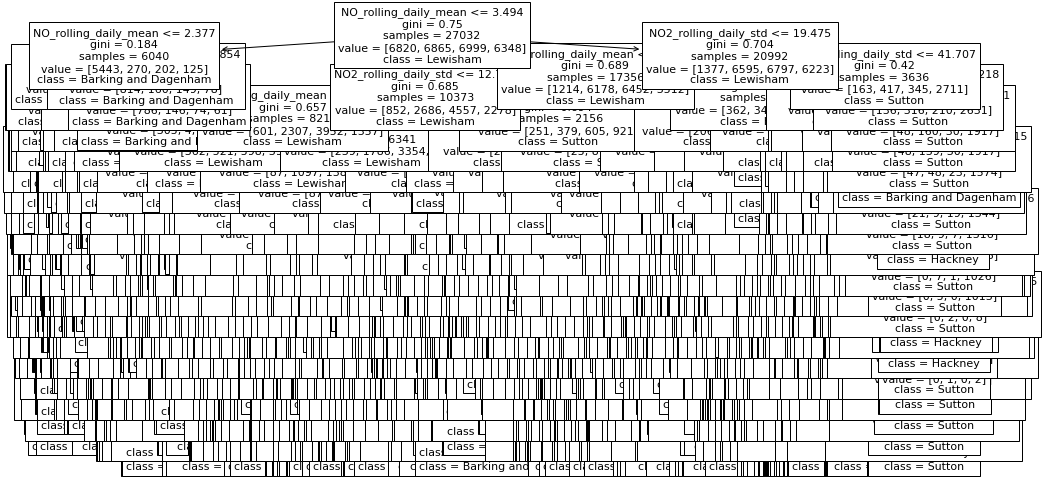

In [96]:
max_depth = 20
x_labels = ['NO2',
 'NOX',
 'NO',
 'NO2_rolling_daily_mean',
 'NOX_rolling_daily_mean',
 'NO_rolling_daily_mean',
 'NOX_rolling_daily_std',
 'NO2_rolling_daily_std',
 'NO_rolling_daily_std']

x = df_combined[x_labels]
y = df_combined['Site']
#Fit model
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(x_train,y_train)
#See if the model works
y_pred = model.predict(x_test)
num_incorrect = (y_test != y_pred).sum()
total = y_test.shape[0]
acc = (total - num_incorrect) / total * 100
print("Accuracy:", acc)
plt.figure(figsize=(15,8))
my_plot = plot_tree(model, feature_names=x_labels,fontsize=11,class_names = ["Barking and Dagenham","Hackney","Lewisham","Sutton"]) 

Accuracy increases with a higher MaxDepth. In order to make my model as accurate as possible without overfitting, I chose a MaxDepth value of 20.

#### Clustering Model

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [31]:
dfcluster=df_combined.drop('ReadingDateTime',1)

In [136]:
dfcluster.loc[dfcluster['Site'] == 'Barking and Dagenham', 'Area'] = 0
dfcluster.loc[dfcluster['Site'] == 'Hackney', 'Area'] = 1
dfcluster.loc[dfcluster['Site'] == 'Lewisham', 'Area'] = 2
dfcluster.loc[dfcluster['Site'] == 'Sutton', 'Area'] = 3
dfcluster

,Site,NO2,NOX,NO,Since_start_of_year,NO2_rolling_daily_mean,NOX_rolling_daily_mean,NO_rolling_daily_mean,NOX_rolling_daily_std,NO2_rolling_daily_std,NO_rolling_daily_std,Hourly_Wage,White,Asian,Black,Mixed/ Other,Total,Area
23,Barking and Dagenham,21.0,22.40000,0.9,23.0,30.604167,48.091667,11.408333,14.655906,9.067404,7.961260,13.1,109000,54000,36000,15000,215000,0.0
24,Barking and Dagenham,15.3,16.50000,0.8,24.0,31.241667,48.779167,11.441667,12.535479,7.159239,7.912946,13.1,109000,54000,36000,15000,215000,0.0
25,Barking and Dagenham,13.4,15.30000,1.2,25.0,30.475000,47.666667,11.212500,14.233111,8.029199,8.132827,13.1,109000,54000,36000,15000,215000,0.0
26,Barking and Dagenham,12.4,14.30000,1.2,26.0,29.683333,46.275000,10.820833,15.778666,8.830711,8.386012,13.1,109000,54000,36000,15000,215000,0.0
27,Barking and Dagenham,10.5,11.00000,0.3,27.0,28.870833,44.587500,10.245833,17.288984,9.658584,8.621206,13.1,109000,54000,36000,15000,215000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34379,Sutton,44.5,141.80000,63.5,8027.0,51.133333,101.845833,33.075000,46.584257,15.335513,24.096784,15.8,147000,36000,11000,10000,204000,3.0
34380,Sutton,52.5,147.50000,62.0,8028.0,51.570833,104.445833,34.487500,47.344151,15.212909,24.776467,15.8,147000,36000,11000,10000,204000,3.0
34381,Sutton,54.8,152.89999,64.0,8029.0,52.133333,107.883332,36.362500,47.757937,15.065500,25.251635,15.8,147000,36000,11000,10000,204000,3.0
34382,Sutton,54.1,132.39999,51.0,8030.0,52.262500,109.466665,37.308333,47.921118,15.068649,25.361404,15.8,147000,36000,11000,10000,204000,3.0


In [171]:
x = dfcluster
x = x.drop("Area", axis = 1)
x = x.drop("Site", axis = 1)
y = dfcluster['Area']


In [172]:
dfcluster.columns

Index(['Site', 'NO2', 'NOX', 'NO', 'Since_start_of_year',
       'NO2_rolling_daily_mean', 'NOX_rolling_daily_mean',
       'NO_rolling_daily_mean', 'NOX_rolling_daily_std',
       'NO2_rolling_daily_std', 'NO_rolling_daily_std', 'Hourly_Wage', 'White',
       'Asian', 'Black', 'Mixed/ Other', 'Total', 'Area'],
      dtype='object')

In [173]:
x = StandardScaler().fit_transform(x)

In [174]:
pca = PCA(n_components=2)
x_2d = pca.fit_transform(x)

<Figure size 576x576 with 0 Axes>

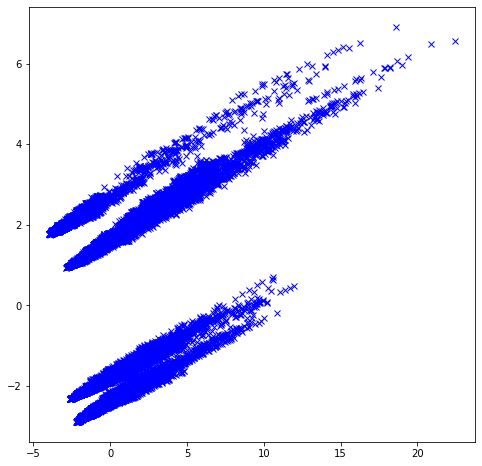

In [175]:
plt.figure(figsize=(8, 8))
a = plt.plot(x_2d[:,0],x_2d[:,1],"bx")

In [176]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='r', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_clusters(clusterer, X):
    labels = clusterer.predict(X)
    pca = PCA(n_components=2)
    x_2d = pca.fit_transform(X)
    plt.scatter(x_2d[:, 0], x_2d[:, 1], c=labels, alpha=0.3, cmap="jet")
    plot_centroids(clusterer.cluster_centers_)
    

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

KMeans(n_clusters=11)

KMeans(n_clusters=12)

KMeans(n_clusters=13)

KMeans(n_clusters=14)

KMeans(n_clusters=15)

KMeans(n_clusters=16)

KMeans(n_clusters=17)

KMeans(n_clusters=18)

KMeans(n_clusters=19)

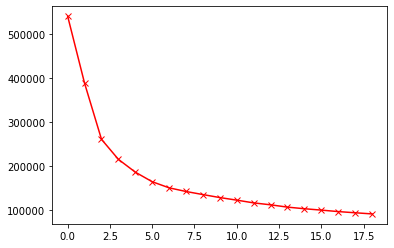

In [177]:
scores=[]
for i in range(1,20):
    
    means=KMeans(n_clusters=i)
    means.fit(x)

    scores.append(means.inertia_)
plt.plot(scores,"-rx")

I used a k value of 4 based on the the elbow plot above and prior understanding that there are 4 boroughs being evaluated in the data.

KMeans(n_clusters=4, random_state=42)

<Figure size 576x576 with 0 Axes>

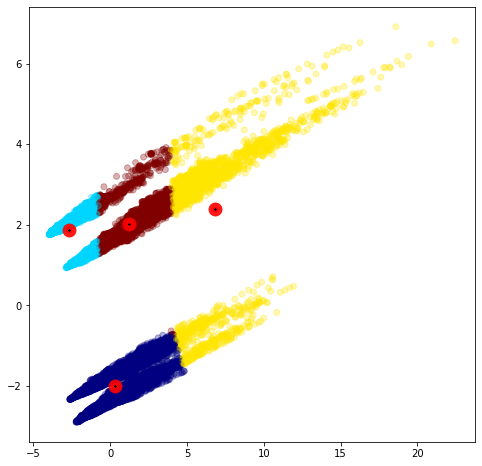

In [183]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_2d)
plt.figure(figsize=(8, 8))
plot_clusters(kmeans, x_2d)

KMeans(n_clusters=4, random_state=42)

<Figure size 864x576 with 0 Axes>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

<BarContainer object of 4 artists>

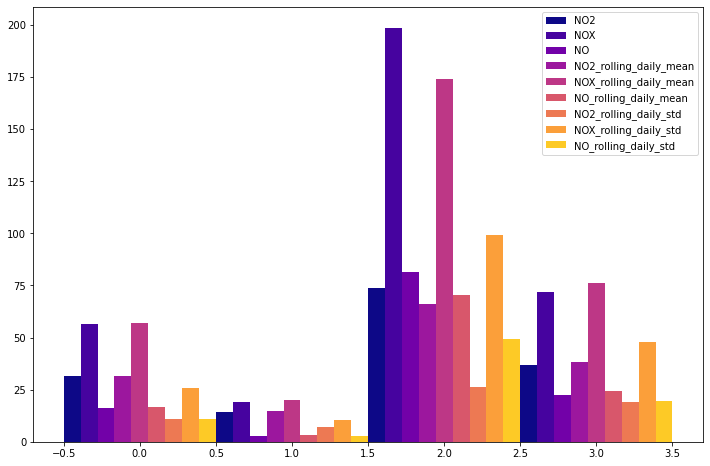

In [187]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_2d)

labels = kmeans.predict(x_2d)
dfcluster["cluster"] = labels

features = ['NO2', 'NOX', 'NO','NO2_rolling_daily_mean','NOX_rolling_daily_mean','NO_rolling_daily_mean','NO2_rolling_daily_std','NOX_rolling_daily_std','NO_rolling_daily_std']

plt.figure(figsize=(12, 8))

cmap = plt.cm.get_cmap('plasma')

#Iterate through features
for index, f in enumerate(features):
    #Get mean for each feature for each cluster
    data = [np.mean(dfcluster[dfcluster["cluster"]==i][f]) for i in range(k)]
    
    width = 1/(len(features))
    x_vals = np.arange(len(data)) + (width*index) - 0.5 + width/2
    
    #Plot this feature for each cluster
    plt.bar(x_vals, data, width = width, label = f, color = cmap(index/len(features)))
    
plt.legend()

#### Plotting Changes in Gas Levels Over Time

Text(0.5, 1.0, ' Barking and Dagenham')

Text(0.5, 1.0, 'Hackney')

Text(0.5, 1.0, ' Lewisham')

Text(0.5, 1.0, 'Sutton')

[Text(0, 0.5, 'NO2 Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NO2 Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NO2 Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NO2 Level'), Text(0.5, 0, 'Date')]

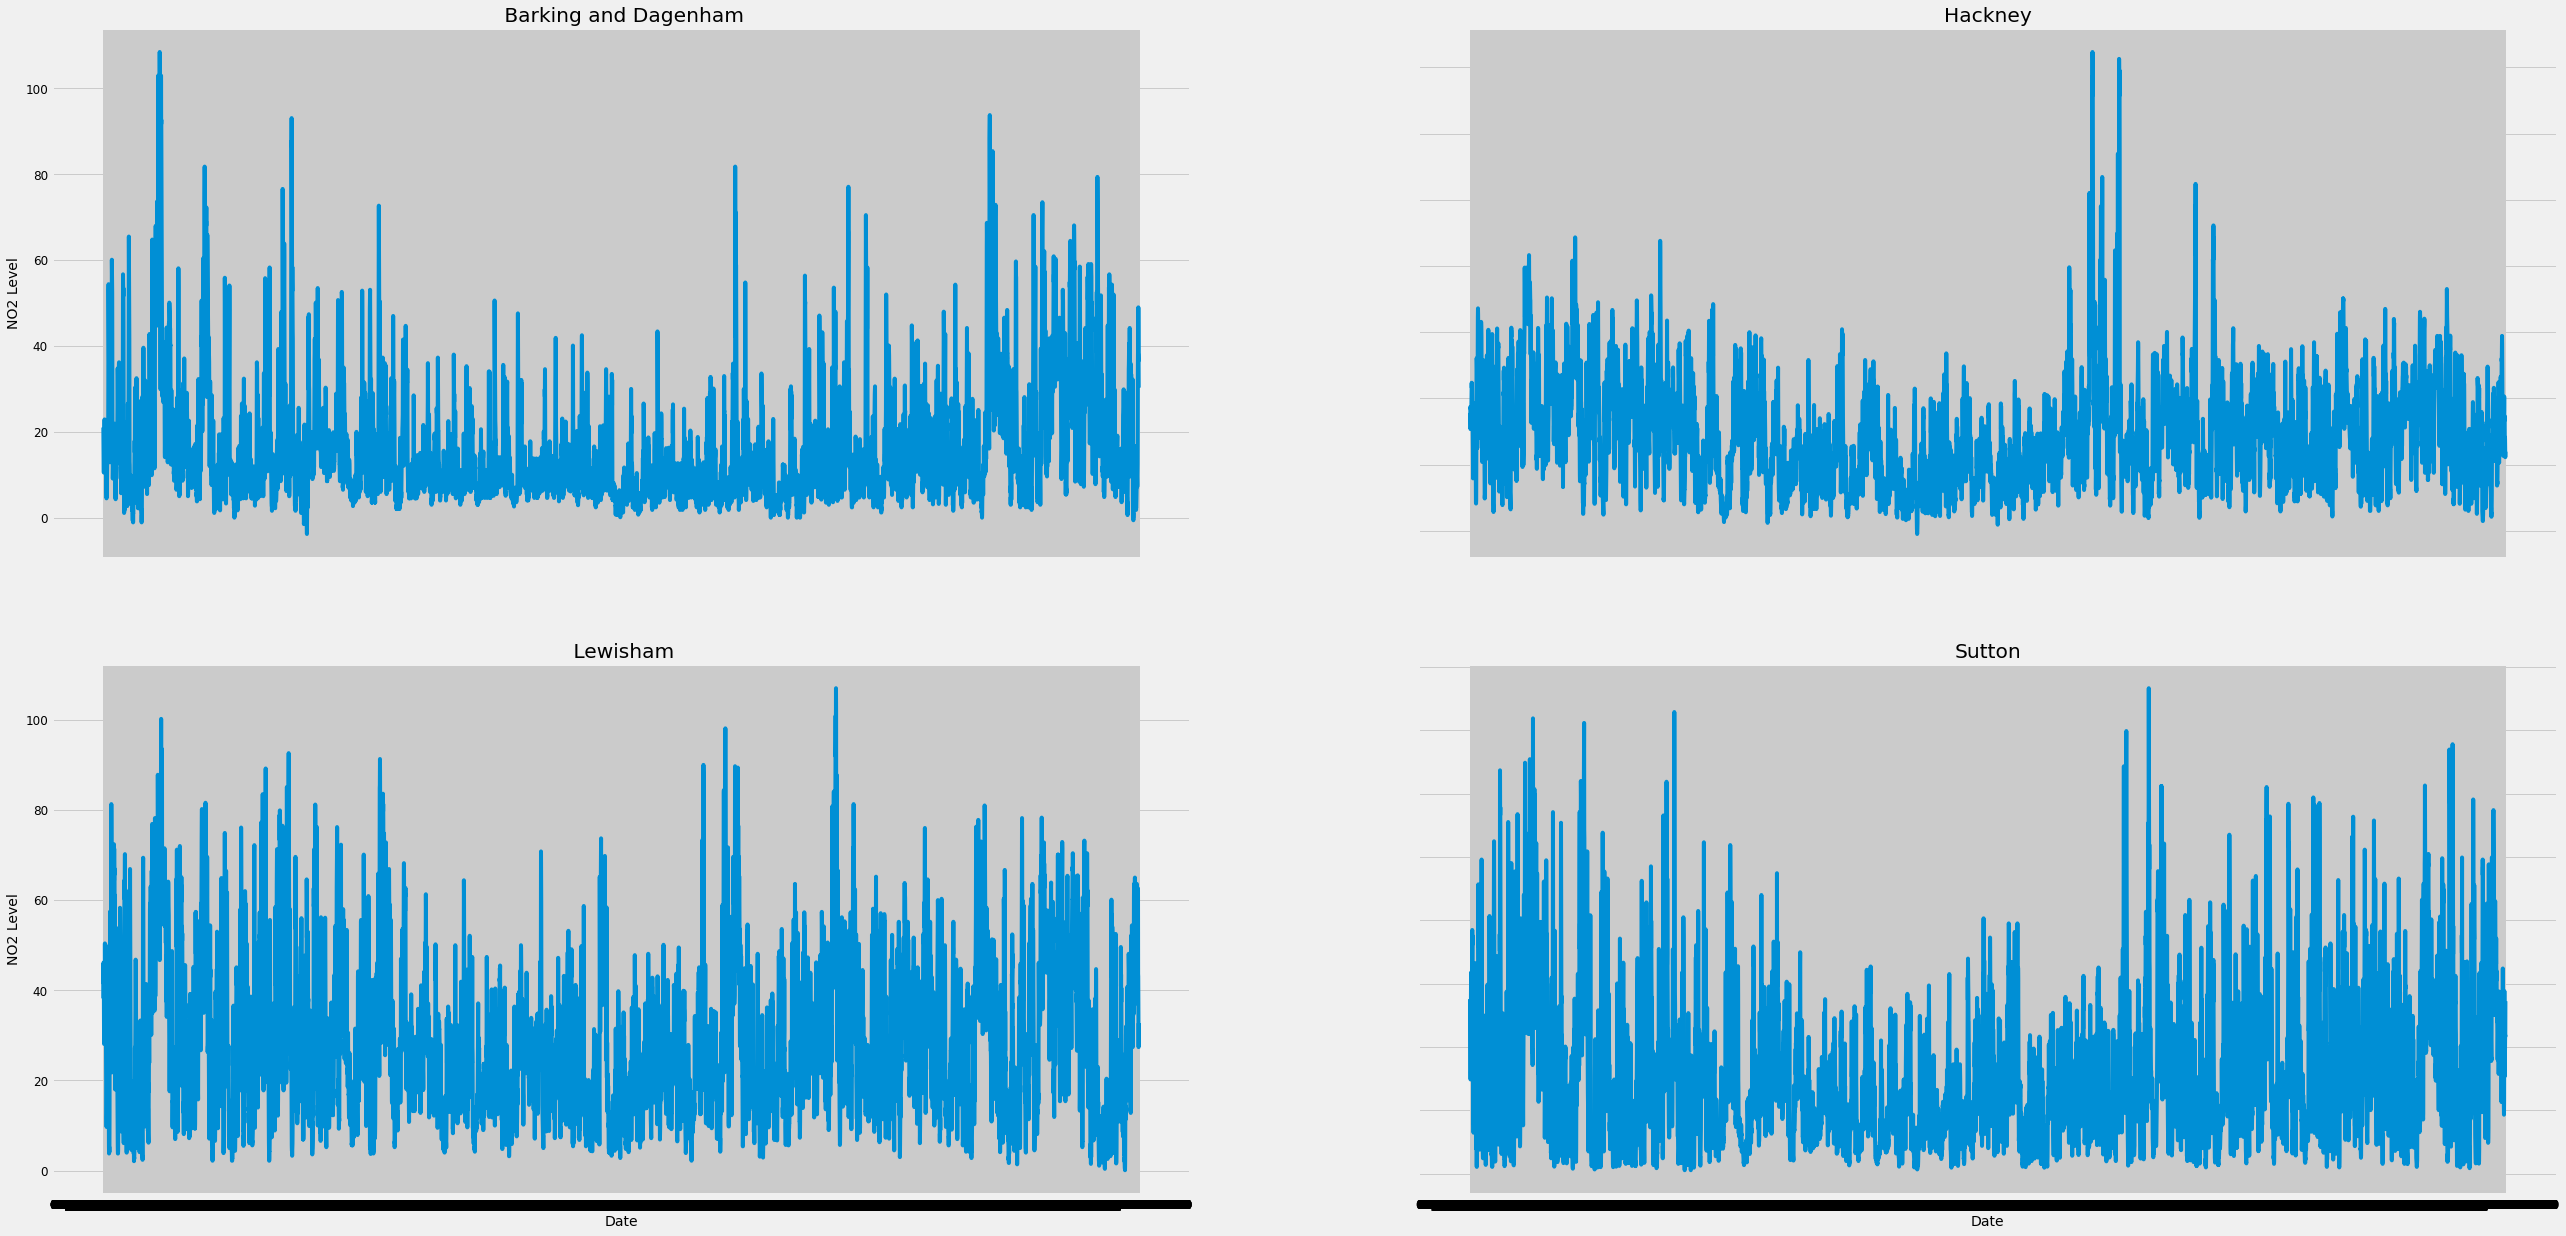

In [228]:
fig, axs = plt.subplots(2, 2,figsize=(40,20))
axs[0, 0].plot(df1['ReadingDateTime'], df1['NO2'])
axs[0, 0].set_title(' Barking and Dagenham')
axs[0, 1].plot(df2['ReadingDateTime'], df2['NO2'])
axs[0, 1].set_title('Hackney')
axs[1, 0].plot(df3['ReadingDateTime'], df3['NO2'])
axs[1, 0].set_title(' Lewisham')
axs[1, 1].plot(df4['ReadingDateTime'], df4['NO2'])
axs[1, 1].set_title('Sutton')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='NO2 Level')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0.5, 1.0, ' Barking and Dagenham')

Text(0.5, 1.0, 'Hackney')

Text(0.5, 1.0, ' Lewisham')

Text(0.5, 1.0, 'Sutton')

[Text(0, 0.5, 'NOX Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NOX Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NOX Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NOX Level'), Text(0.5, 0, 'Date')]

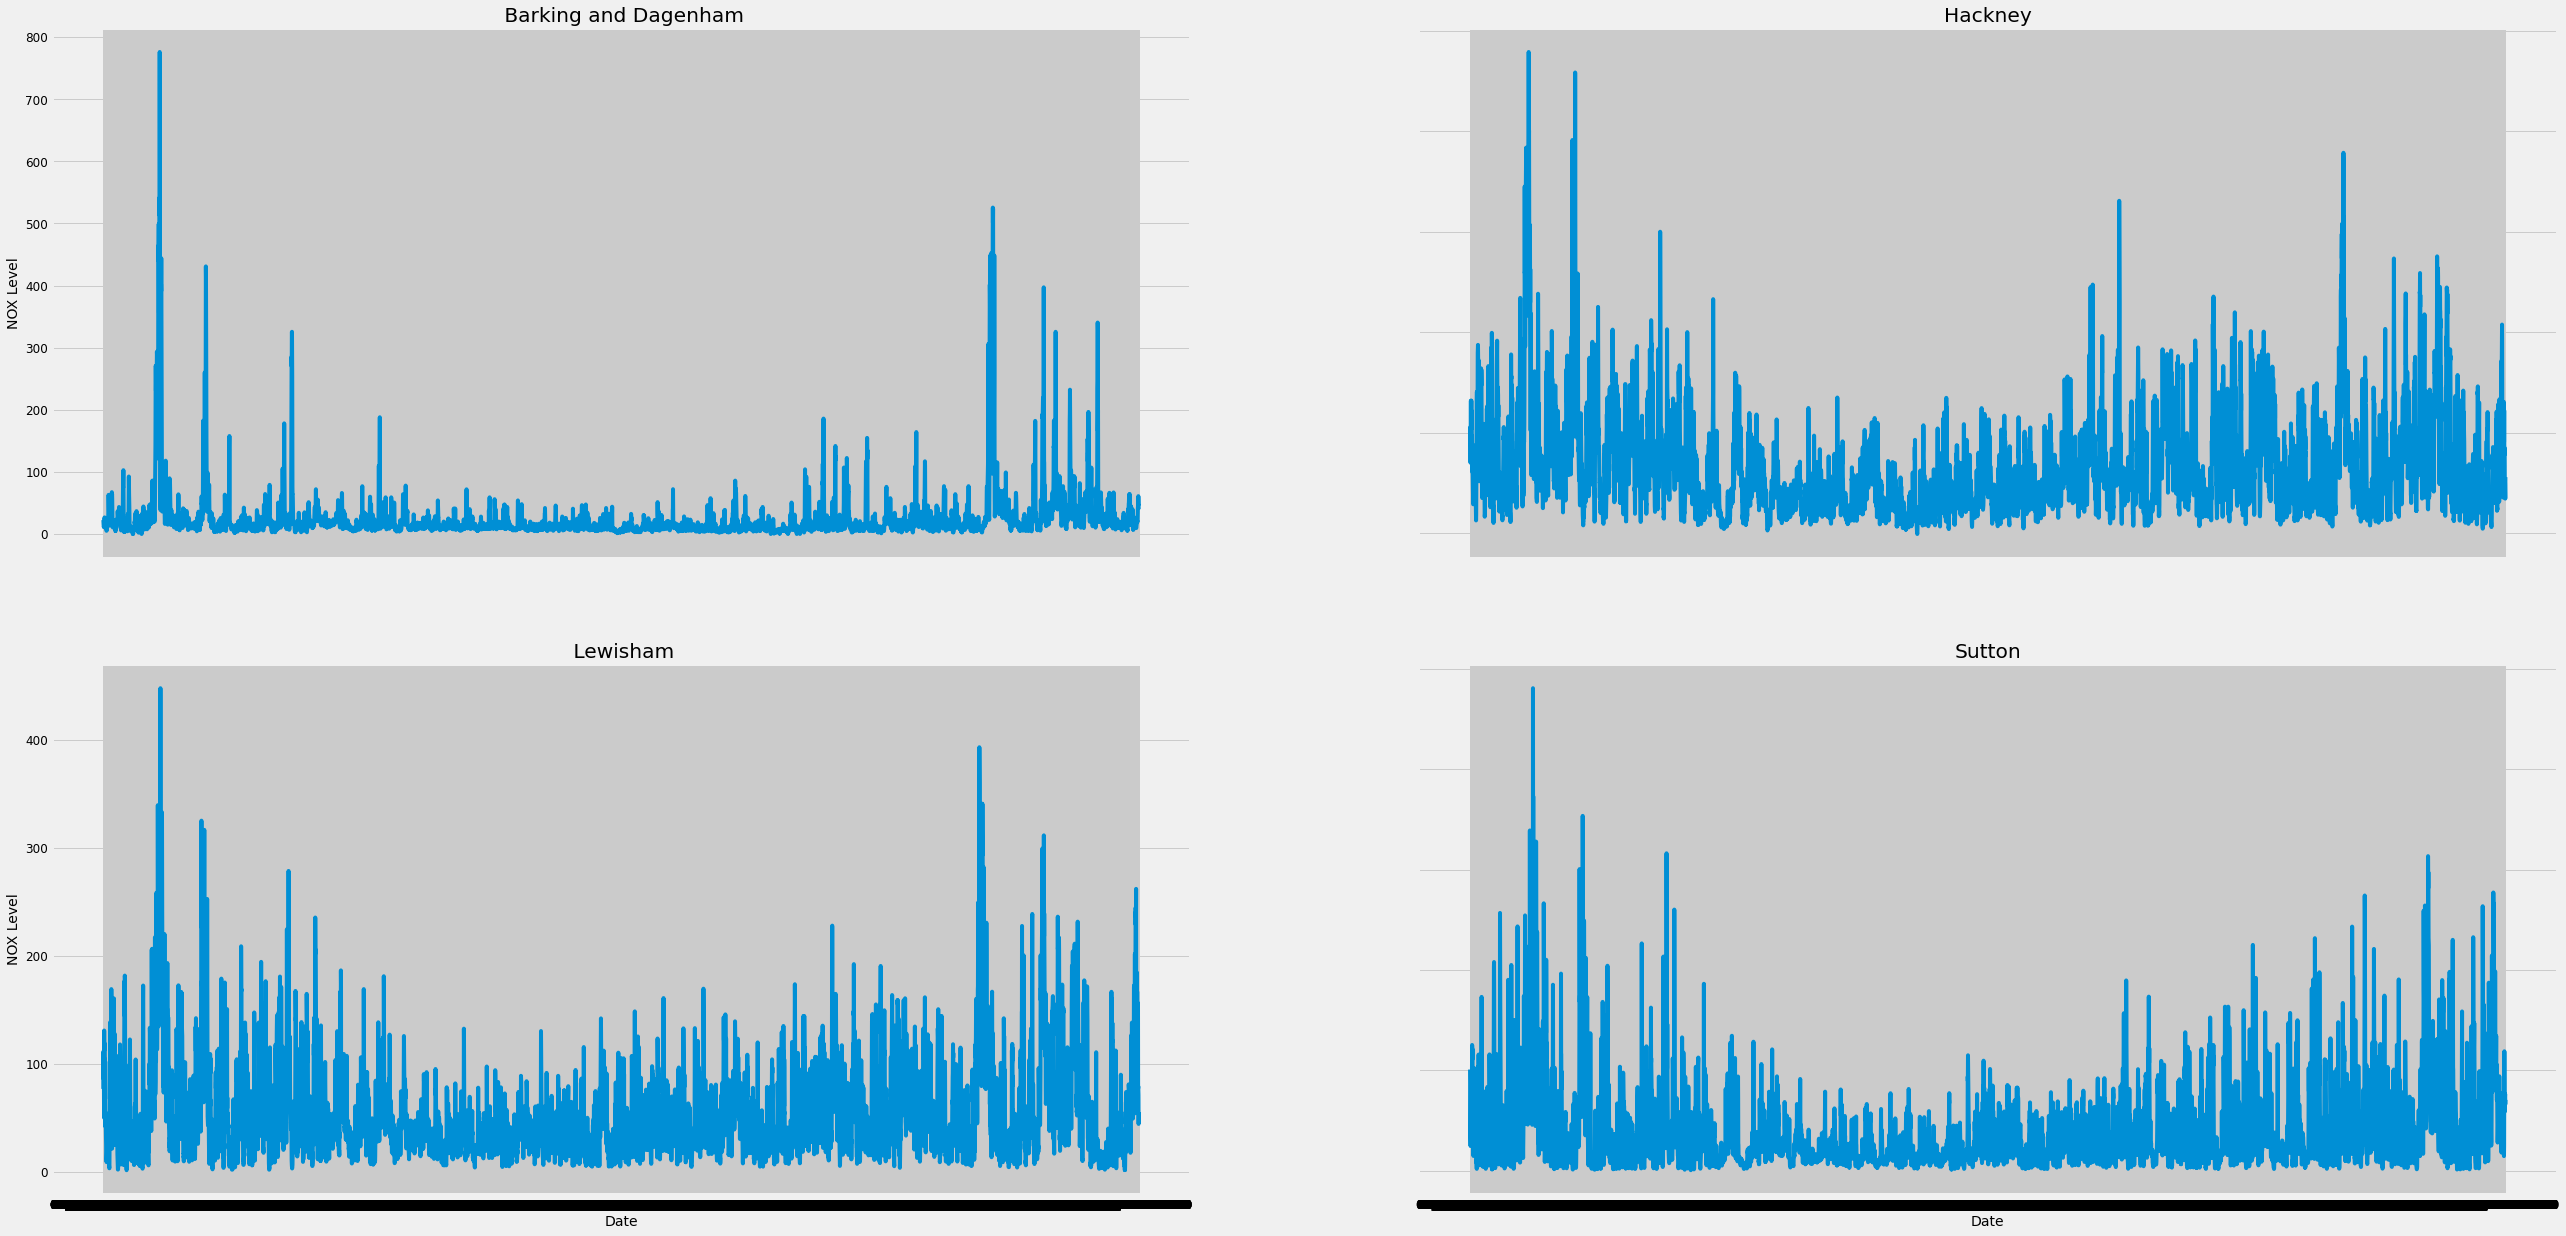

In [227]:
fig, axs = plt.subplots(2, 2,figsize=(40,20))
axs[0, 0].plot(df1['ReadingDateTime'], df1['NOX'])
axs[0, 0].set_title(' Barking and Dagenham')
axs[0, 1].plot(df2['ReadingDateTime'], df2['NOX'])
axs[0, 1].set_title('Hackney')
axs[1, 0].plot(df3['ReadingDateTime'], df3['NOX'])
axs[1, 0].set_title(' Lewisham')
axs[1, 1].plot(df4['ReadingDateTime'], df4['NOX'])
axs[1, 1].set_title('Sutton')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='NOX Level')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Text(0.5, 1.0, ' Barking and Dagenham')

Text(0.5, 1.0, 'Hackney')

Text(0.5, 1.0, ' Lewisham')

Text(0.5, 1.0, 'Sutton')

[Text(0, 0.5, 'NO Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NO Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NO Level'), Text(0.5, 0, 'Date')]

[Text(0, 0.5, 'NO Level'), Text(0.5, 0, 'Date')]

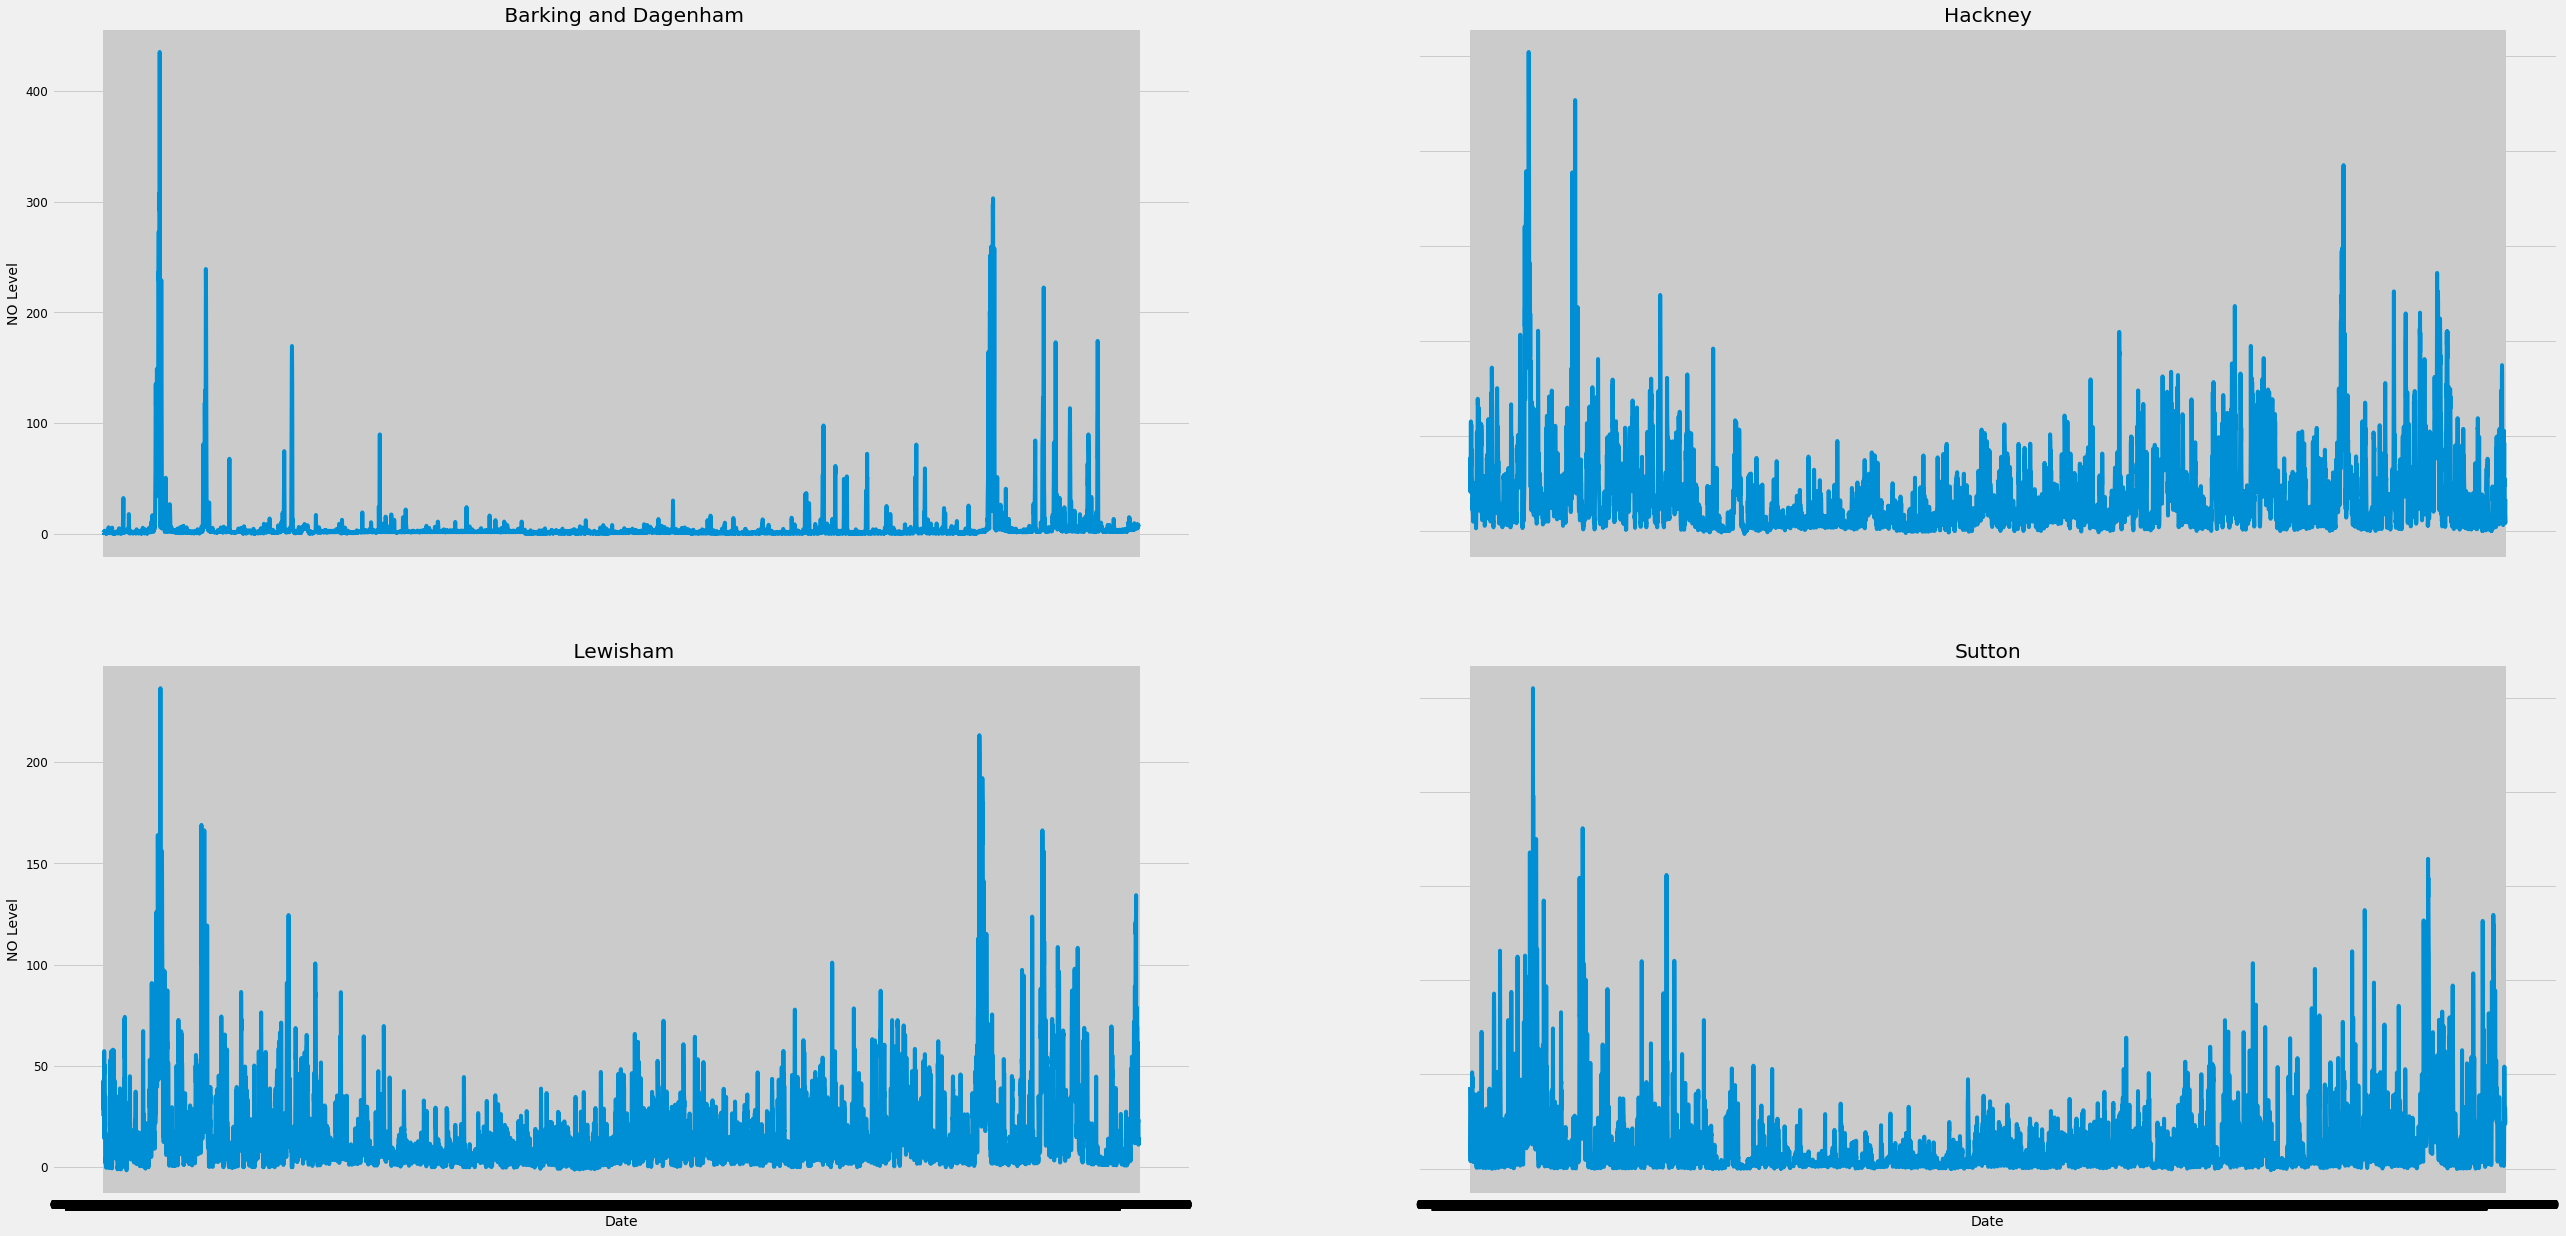

In [229]:
fig, axs = plt.subplots(2, 2,figsize=(40,20))
axs[0, 0].plot(df1['ReadingDateTime'], df1['NO'])
axs[0, 0].set_title(' Barking and Dagenham')
axs[0, 1].plot(df2['ReadingDateTime'], df2['NO'])
axs[0, 1].set_title('Hackney')
axs[1, 0].plot(df3['ReadingDateTime'], df3['NO'])
axs[1, 0].set_title(' Lewisham')
axs[1, 1].plot(df4['ReadingDateTime'], df4['NO'])
axs[1, 1].set_title('Sutton')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='NO Level')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()